In [1]:
# 필요 패키지 다운로드
import pandas as pd
import numpy as np
import urllib.request

import matplotlib.pyplot as plt

In [2]:
import os
os.environ['JAVA_HOME'] = 'C:\\Program Files\\Java\\jdk-21'  # 여기에 자신의 JDK 설치 경로를 입력하세요


In [3]:
df = pd.read_csv('./T/gangnam_cafe_2.csv', encoding= 'utf-8')
df

,name,review
0,한과와락,여기 개성주악 맛있어욤 벌써 2번째입니다\n강남에 이렇게 이쁜 카페 있는줄 몰랐다 ...
1,레뽀드라라 강남점,비엔나 커피 맛있어요\n유명한 스콘집이라고 왔어요 분위기도좋고 스콘도 맛있네요 특이...
2,한과와락,여기 개성주악 맛있어욤 벌써 2번째입니다\n강남에 이렇게 이쁜 카페 있는줄 몰랐다 ...
3,레뽀드라라 강남점,비엔나 커피 맛있어요\n유명한 스콘집이라고 왔어요 분위기도좋고 스콘도 맛있네요 특이...
4,스템커피 강남점,디저트 종류도 많고 카페도 깨끗해서 좋아요:)\n라떼 넘 맛있어엽! 전반적으로 달달...
...,...,...
103,빌리엔젤 강남358타워점,"강남역에 3곳중 이 곳으로 오게 되었는데 매우 별로네요, 그리고 네이버 이용시간으로..."
104,잠바주스 서초삼성타운점,굿\n매장에 들어가자마자 과일향이 화악~~~!\n굿\n직원분이 다소 친절하지 않음\...
105,어스마카롱,베이글 아메 세트 저렴해서 좋아요.\n마카롱 귀엽고 맛있어요\n꽈배기도 맛있고 베이...
106,시티갤러리카페 본점,"굿\n베이글이랑 커피 맛있어용\n아이스크림라떼, 단호박크로플, 리코타시티샐러드 이렇..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    108 non-null    object
 1   review  108 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [8]:
# 1. 중복 데이터 확인하기
df['name'].nunique(), df['review'].nunique()

(99, 102)

In [9]:
# 2. 중복 데이터 제거
df = df.drop_duplicates(subset=['name'])
df.nunique()

name      99
review    99
dtype: int64

In [10]:
df = df.dropna(how='any')
df.isnull().values.sum()

0

In [16]:
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 : ; / + | . - \s \n  0-9a-zA-z]", "").str.strip()
df.head(10000)

,name,review
0,한과와락,여기 개성주악 맛있어욤 벌써 2번째입니다\n강남에 이렇게 이쁜 카페 있는줄 몰랐다 ...
1,레뽀드라라 강남점,비엔나 커피 맛있어요\n유명한 스콘집이라고 왔어요 분위기도좋고 스콘도 맛있네요 특이...
4,스템커피 강남점,디저트 종류도 많고 카페도 깨끗해서 좋아요:)\n라떼 넘 맛있어엽! 전반적으로 달달...
5,알베르,대화\n복잡한 강남 한복판에 이런 공간이 있다니!!\n공간이 넓어서 여유있고 편해요...
6,호랑가시,맛있어요. ㅎㅎㅎ \n일단 대형카페여서 너무좋고 빵들도 특이한게 많아요 맛도 좋고 ...
...,...,...
103,빌리엔젤 강남358타워점,"강남역에 3곳중 이 곳으로 오게 되었는데 매우 별로네요, 그리고 네이버 이용시간으로..."
104,잠바주스 서초삼성타운점,굿\n매장에 들어가자마자 과일향이 화악~~~!\n굿\n직원분이 다소 친절하지 않음\...
105,어스마카롱,베이글 아메 세트 저렴해서 좋아요.\n마카롱 귀엽고 맛있어요\n꽈배기도 맛있고 베이...
106,시티갤러리카페 본점,"굿\n베이글이랑 커피 맛있어용\n아이스크림라떼, 단호박크로플, 리코타시티샐러드 이렇..."


In [17]:
# 내용이 아무것도 없는 문자열의 개수 세어보기
# 영어 또는 특수기호로만 이루어진 리뷰는 내용이 없는 채로 존재
df.loc[df['review']=="", 'review'].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
df = df.loc[df['review'] != ""]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    99 non-null     object
 1   review  99 non-null     object
dtypes: object(2)
memory usage: 2.3+ KB


In [20]:
# 테스트 데이터도 훈련 데이터와 동일하게 처리
df.drop_duplicates(subset=['review'], inplace=True)
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "").str.strip()
df = df.loc[df['review'] != ""]
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    99 non-null     object
 1   review  99 non-null     object
dtypes: object(2)
memory usage: 2.3+ KB


In [21]:
from tqdm import tqdm_notebook
from konlpy.tag import Okt

okt = Okt()

df = df.dropna(subset=['review'])
df = df[df['review'].apply(lambda x: isinstance(x, str))]


X_train = [] # 훈련할 코퍼스

for sentence in tqdm_notebook(df['review']):
  temp_X = okt.morphs(sentence, stem=True, norm=True) # 각 문장에 대해 형태소 분리가 일어난다.
  X_train.append(temp_X) # 형태소 분리가 일어난 문장을 말뭉치에 추가


#   # review 열에서 결측치(NaN)가 있는 행 제거
# df = df.dropna(subset=['review'])

# # 모든 리뷰를 문자열로 변환
# df['review'] = df['review'].astype(str)

# for sentence in tqdm_notebook(df['review']):
#   temp_X = okt.morphs(sentence, stem=True, norm=True)
#   X_train.append(temp_X)


C:\Users\figure.2\AppData\Local\Temp\ipykernel_34088\4254972061.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(df['review']):


  0%|          | 0/99 [00:00<?, ?it/s]

In [22]:
X_train[:3]

[['여기',
  '개성',
  '주악',
  '맛있다',
  '욤',
  '벌써',
  '2',
  '번',
  '째',
  '이다',
  '\n',
  '강남',
  '에',
  '이렇게',
  '이쁘다',
  '카페',
  '있다',
  '모르다',
  '하다',
  '지난달',
  '에',
  '오픈',
  '하다',
  '.',
  '경치',
  '도',
  '좋다',
  '차',
  '향',
  '도',
  '좋다',
  '인테리어',
  '도',
  '너무',
  '잘',
  '하다',
  '!',
  '다만',
  '공간',
  '이',
  '막',
  '넓다',
  '직',
  '넓다',
  '\n',
  '직하다',
  '않다',
  '계단',
  '을',
  '좀',
  '오르다',
  '풍경',
  '(',
  '바람',
  '불면',
  '찰랑',
  '찰랑하다',
  '소리내다',
  ')',
  '이',
  '있다',
  '차다',
  '좋다',
  '생각',
  '이',
  '들다',
  '!',
  '기분',
  '좋다',
  '식후차',
  '하다',
  '가다',
  '!~',
  '다음',
  '\n',
  '엔',
  '여자친구',
  '데려오다',
  'ㅎㅎ',
  '\n',
  '정성',
  '스럽게',
  '주다',
  '차',
  '맛있다',
  '\n',
  '약과',
  '는',
  '너무',
  '달다',
  '...',
  '\n',
  '공장',
  '형',
  '약과',
  '와는',
  '다른',
  '개성',
  '약과',
  '가',
  '달',
  '지',
  '않다',
  '너무',
  '좋다',
  '!',
  '\n',
  '다양하다',
  '맛',
  '의',
  '양갱',
  '도',
  '수제',
  '라서',
  '그렇다',
  '부드럽다',
  '입',
  '에',
  '딱',
  '맞다',
  '.',
  '\n',
  '다시',
  '방문',
  '하다',
  '주악',
  '도'

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [24]:
# 정수 인코딩 된 단어 집합 확인
print(tokenizer.word_index)

{'\n': 1, '좋다': 2, '맛있다': 3, '도': 4, '하다': 5, '이': 6, '.': 7, '가': 8, '에': 9, '!': 10, '너무': 11, '있다': 12, '먹다': 13, '커피': 14, '맛': 15, '굿': 16, '는': 17, '많다': 18, '~': 19, '친절하다': 20, ',': 21, '은': 22, '넓다': 23, '매장': 24, '카페': 25, '!!': 26, '보다': 27, '빵': 28, '음료': 29, '요': 30, '같다': 31, '이다': 32, '오다': 33, '디저트': 34, '들': 35, '..': 36, '을': 37, '곳': 38, '분위기': 39, '으로': 40, '않다': 41, '에서': 42, '넘다': 43, '진짜': 44, 'ㅎㅎ': 45, '가다': 46, '다': 47, '한': 48, '크다': 49, '없다': 50, '자다': 51, '로': 52, '예쁘다': 53, '직원': 54, '나': 55, '강남': 56, '케이크': 57, '방문': 58, '것': 59, '사람': 60, '맛집': 61, '랑': 62, '강남역': 63, '인테리어': 64, '를': 65, '의': 66, '안': 67, '주문': 68, '가격': 69, '하고': 70, '정말': 71, '...': 72, '라떼': 73, '종류': 74, '때': 75, '층': 76, '들다': 77, '자리': 78, '수': 79, '또': 80, '만': 81, '와': 82, ':)': 83, '고': 84, '~~': 85, '좀': 86, '이라': 87, '나오다': 88, '다양하다': 89, '크림': 90, '조용하다': 91, '메뉴': 92, '이에요': 93, '깔끔하다': 94, '분': 95, '엄청': 96, '다음': 97, '되다': 98, '많이': 99, '비싸다': 100, '님': 101, '굳다': 102, '

In [25]:
# threshold 만큼 등장하지 않은 단어들의 비율 확인
def print_freq(threshold):

  total_cnt = len(tokenizer.word_index) # 단어 개수
  rare_cnt  = 0 # 등장 빈도가 threshold보다 작은 단어의 개수를 카운트

  total_freq = 0 # 훈련 데이터 전체 단어 빈도수 총 합. 영화: 3번, 재미: 5번 -> total_freq = 8
  rare_freq  = 0 # 사용된 희귀 단어의 총 합

  for key, value in tokenizer.word_counts.items():
    # key : 단어, value : 빈도수
    total_freq = total_freq + value # 모든 단어의 빈도수 총 합 구하기

    # 희귀단어 개수 및 등장 빈도 계산하기
    if value < threshold :
      rare_cnt += 1
      rare_freq += value

  print("단어 집합의 크기 : {}".format(total_cnt))
  print("등장 빈도가 {} 미만인 희귀 단어의 수 : {}".format(threshold, rare_cnt))
  print("단어 집합에서 희귀 단어의 비율 : {:.3f}%".format((rare_cnt / total_cnt) * 100))
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : {:.3f}%".format((rare_freq / total_freq) * 100))
  print("="*50)

  return total_cnt, rare_cnt

In [26]:
print_freq(2)
print_freq(3)
print_freq(4)
print_freq(5)

단어 집합의 크기 : 6984
등장 빈도가 2 미만인 희귀 단어의 수 : 3305
단어 집합에서 희귀 단어의 비율 : 47.322%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 3.057%
단어 집합의 크기 : 6984
등장 빈도가 3 미만인 희귀 단어의 수 : 4218
단어 집합에서 희귀 단어의 비율 : 60.395%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 4.746%
단어 집합의 크기 : 6984
등장 빈도가 4 미만인 희귀 단어의 수 : 4767
단어 집합에서 희귀 단어의 비율 : 68.256%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 6.270%
단어 집합의 크기 : 6984
등장 빈도가 5 미만인 희귀 단어의 수 : 5108
단어 집합에서 희귀 단어의 비율 : 73.139%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 7.531%


(6984, 5108)

In [28]:
# vocab_size : |V| 사용할 단어의 개수.
# 전체 단어의 개수 - 희귀 단어의 개수

total_cnt, rare_cnt = print_freq(3)

vocab_size = total_cnt - rare_cnt + 2 # <oov>, <pad> 고려해서 + 2
vocab_size

단어 집합의 크기 : 6984
등장 빈도가 3 미만인 희귀 단어의 수 : 4218
단어 집합에서 희귀 단어의 비율 : 60.395%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 4.746%


2768

In [29]:
# 희귀 단어를 사용하지 않고 토크나이저 재구성
tokenizer = Tokenizer(vocab_size, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)

In [31]:
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_train_encoded[:3]

[[106,
  505,
  410,
  4,
  633,
  1152,
  151,
  236,
  1086,
  33,
  2,
  57,
  10,
  390,
  131,
  26,
  13,
  303,
  6,
  1,
  10,
  333,
  6,
  8,
  1,
  5,
  3,
  357,
  237,
  5,
  3,
  65,
  5,
  12,
  197,
  6,
  11,
  426,
  146,
  7,
  954,
  24,
  1345,
  24,
  2,
  1014,
  42,
  1640,
  38,
  87,
  1247,
  2219,
  194,
  1346,
  1,
  1,
  1,
  1,
  201,
  7,
  13,
  367,
  3,
  183,
  7,
  78,
  11,
  215,
  3,
  1,
  6,
  47,
  2220,
  98,
  2,
  165,
  1153,
  1878,
  46,
  2,
  1087,
  1248,
  230,
  357,
  4,
  2,
  439,
  18,
  12,
  238,
  73,
  2,
  2221,
  1,
  439,
  1,
  116,
  505,
  439,
  9,
  196,
  169,
  42,
  12,
  3,
  11,
  2,
  90,
  16,
  67,
  1249,
  5,
  1154,
  391,
  148,
  172,
  401,
  10,
  239,
  427,
  8,
  2,
  343,
  59,
  6,
  410,
  5,
  14,
  28,
  273,
  31,
  20,
  2,
  410,
  93,
  36,
  23,
  48,
  4,
  116,
  93,
  36,
  23,
  1155,
  902,
  462,
  463,
  410,
  711,
  6,
  236,
  108,
  47,
  2,
  712,
  35,
  12,
  4,
  777,
  106

In [46]:
# 길이가 1미만인 배열의 인덱스 - 텍스트가 없다!
X_train_encoded = [sentence for sentence in X_train_encoded if len(sentence) >= 1]
print(X_train_encoded[:3])


[[106, 505, 410, 4, 633, 1152, 151, 236, 1086, 33, 2, 57, 10, 390, 131, 26, 13, 303, 6, 1, 10, 333, 6, 8, 1, 5, 3, 357, 237, 5, 3, 65, 5, 12, 197, 6, 11, 426, 146, 7, 954, 24, 1345, 24, 2, 1014, 42, 1640, 38, 87, 1247, 2219, 194, 1346, 1, 1, 1, 1, 201, 7, 13, 367, 3, 183, 7, 78, 11, 215, 3, 1, 6, 47, 2220, 98, 2, 165, 1153, 1878, 46, 2, 1087, 1248, 230, 357, 4, 2, 439, 18, 12, 238, 73, 2, 2221, 1, 439, 1, 116, 505, 439, 9, 196, 169, 42, 12, 3, 11, 2, 90, 16, 67, 1249, 5, 1154, 391, 148, 172, 401, 10, 239, 427, 8, 2, 343, 59, 6, 410, 5, 14, 28, 273, 31, 20, 2, 410, 93, 36, 23, 48, 4, 116, 93, 36, 23, 1155, 902, 462, 463, 410, 711, 6, 236, 108, 47, 2, 712, 35, 12, 4, 777, 106, 45, 209, 94, 37, 247, 248, 10, 661, 1347, 79, 224, 227, 51, 231, 6, 283, 284, 1, 54, 30, 5, 54, 381, 10, 955, 44, 149, 402, 165, 382, 10, 59, 6, 1, 2, 410, 4, 11, 2, 410, 7, 13, 4, 2, 3, 11, 2, 505, 411, 1, 1641, 7, 1470, 39, 33, 2, 2222, 10, 1, 43, 14, 76, 18, 1642, 464, 9, 12, 100, 56, 85, 12, 2223, 82, 6, 585, 1

In [47]:
# feature가 제거 되었기 때문에 label도 제거
y_train = np.array(df['name'])
y_train = np.delete(y_train, drop_train, axis=0)
y_train


array(['한과와락', '레뽀드라라 강남점', '스템커피 강남점', '알베르', '호랑가시', '트리오드', '장꼬방',
       '썸띵어바웃커피', '프라텔리', '셀렉티드마롱', '브릭샌드 강남역점', '정월', '수플레 팬케이크 소과당 본점',
       '에이비카페 ab cafe', '타르타르 강남역점', '노티드 강남 카카오', '던킨 라이브 강남', '더달달',
       '퍼스트커피랩 강남점', '어퍼앤언더', '스타벅스 강남R점', '평화다방 강남역점', '겟썸커피 Downstairs',
       '카페온화 강남점', '에슬로우 강남역삼성타운점', '밀도 강남역점', '바게트케이', '크리스피크림도넛 강남역점',
       '원아베뉴', '가배도 강남점', '로버스 선데이 마켓 강남점', '베이커스트 브라운', '베이커리로컬 강남역점',
       '빈스플', '106길 15', '브랑제리 루엘', '브라운홀릭', '설빙 강남역점', '리퍼크', '카페블랭크',
       '미니말레 커피뢰스터 교대점', '빌리엔젤 강남역점', '누볼라', '배스킨라빈스 강남대로점', '강남고망고케이크',
       '본부케', '스타벅스 강남오거리점', '투썸플레이스 강남KI타워점', '크라프트카페', '할리스 강남역점',
       '바나프레소 강남역점', '보노', '킷사텐 역삼점', '라운지 365 강남점', '원퍼밀커피 신논현본점',
       '바나프레소 삼성타운점', '커피빈 강남역12번출구점', '투썸플레이스 강남대륭타워점', '왕가탕후루 강남역점',
       '테이블스', '드롭탑 강남역점', '설빙 양재역점', '케익공방', '바나프레소 강남점', '스타벅스 강남비젼타워점',
       '그레이스케일커피', '스타벅스 강남2점', '강남커피 강남점', '배스킨라빈스 SPC스퀘어점',
       '015 COFFEE', '할리스 강남역2점', '빌리엔젤 강남역5호점', '스타벅스 강남삼성타운점',
       '센터

In [48]:
print("리뷰의 최대 길이 : {}".format(max(len(l) for l in X_train_encoded)))
print("리뷰의 평균 길이 : {}".format(sum(map(len, X_train_encoded)) / len(X_train_encoded)))

리뷰의 최대 길이 : 3905
리뷰의 평균 길이 : 1091.979797979798


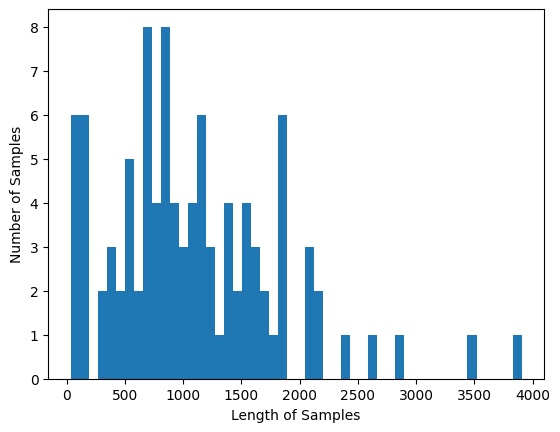

In [49]:
# 시각화
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel("Length of Samples")
plt.ylabel("Number of Samples")
plt.show()

In [50]:
# 최대 길이를 30으로 설정하고 패딩 적용
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train_encoded, maxlen=30)
X_train_padded[:2]

array([[  63,   59,    6,   69,  469,  134,    8,   65,   95,    8,   77,
         214,    1,   52,   78,  468,    9,   13,  148,  396,  159,    5,
          52,   89,    8,  128,   77,  159,   23,   73],
       [ 216, 1503,  695, 1475,  612, 1170,  254,  147,    5,   12,   12,
           4,  326,   10,  443,    1,    7,  121,   86, 1504,  618,  619,
         104,    6,    7,   26,  114,    2,   74,   95]])

In [51]:
import pickle

with open("X_train_padded.pkl", "wb") as f:
  pickle.dump(X_train_padded, f)

with open("y_train.pkl", "wb") as f:
  pickle.dump(y_train, f)

In [52]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential

In [53]:
model = Sequential([
  Embedding(vocab_size, 128),
  SimpleRNN(128), # Cell 내의 뉴런이 128개
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         354304    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 387329 (1.48 MB)
Trainable params: 387329 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [55]:
model.fit(
    X_train_padded,
    y_train,            
    batch_size=64,
    validation_split=0.2,
    epochs=10
)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1046, in launch_instance

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\figure.2\AppData\Local\Temp\ipykernel_34088\1257197116.py", line 1, in <module>

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\figure.2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2521, in binary_crossentropy

Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_3975]

In [44]:
# 일반 자연어(새로운 문장)가 들어 왔을 때 모델을 이용한 처리
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화

  # 정수 인코딩
  encoded = tokenizer.texts_to_sequences([new_sentence])

  # 패딩
  pad_new = pad_sequences(encoded, maxlen=30)

  # 예측
  score = float(model.predict(pad_new))

  # 시그모이드를 사용했기 때문에 결과값이 0.5 넘어가면 긍정 리뷰(1)
  if score > 0.5 :
    print("{:.2f}% 확률로 긍정 리뷰 입니다.".format(score * 100))
  else:
    # 0.5 미만이면 부정 리뷰 (0)
    print("{:.2f}% 확률로 부정 리뷰 입니다.".format(( 1 - score ) * 100))

In [45]:
test_review = "강남역 카페 추천 합니다 ~"
sentiment_predict(test_review)

1/1 [==============================] - 0s 86ms/step
50.65% 확률로 긍정 리뷰 입니다.


C:\Users\figure.2\AppData\Local\Temp\ipykernel_34088\3094749966.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new))


In [27]:
df_33 = pd.read_csv('./gangnam_hospital_ear.csv', encoding= 'utf-8')
df_33

,name,type,review
0,강남코모키이비인후과의원,이비인후과,친절해요\n조아요\n의사샘이 진료를 무척 상세하게 봐쥬셔서 여기만 갑니다! 빨리 나...
1,강남삼성드림이비인후과의원,이비인후과,심한 알레르기비염+코감기로 방문했습니다 이비인후과 두곳을 갔는데도 안낫고 삼주동안 ...
2,연세코앤이비인후과의원,이비인후과,"진료 너무 친절하게 잘봐주시고, 약도 잘 맞아요!\n의사샘 친절하시고 차분히 설명충..."
3,하나이비인후과병원,이비인후과,최고병원\n좋아요 \n예약 상담 잡을 때도 시간 변경하느라 몇 번 전화했었는데 직원...
4,김성근이비인후과의원,이비인후과,전화응대부터 진료끝날때까지 다들 너무 친절히 대해주셔서\n리뷰남깁니다.\n초진인데도...
5,영이비인후과의원,이비인후과,진료 잘 보세요~\n긋\n친절합니다 \n언제나 좋아요~~~\n굿\n원장쌤 진짜 꼼꼼...
6,삼성이비인후과의원,이비인후과,콧물빼는데 안아프게 잘해주심~\n친절해요\n회사근처라자주방문합니다 \n👍\n이제서야...
7,베스트이화의원,내과,임신 준비 중인데 폐렴 예방 접종 미리 하면 좋을 거 같아서 신랑이랑 함께 맞았어요...
8,뉴연세의원,이비인후과,원장선생님 너무 친절하시고 너무 진찰도 잘봐주세요 최고에요\n첫방문했습니다 우선 ...
9,강남서울이비인후과의원,이비인후과,공휴일에 갑자기 이석증이 생겨서 방문했습니다. 전날 집 근처 이비인후과 갔는데 별로...
